In [1]:
import nba_data as nba
import pandas as pd
import numpy as np
import pickle
from datetime import date

In [45]:
df = nba.run_all(startYear=2019, endYear=2021)

In [46]:
df.head()

,Season,Date,Game_Day,Time_ET,Vis_Team,Vis_Pts,Home_Team,Home_Pts,OT,Attend,...,2020-2021_TeamWinPct,2018-2019_OppPtsFor,2018-2019_OppPtsAllowed,2018-2019_OppWinPct,2019-2020_OppPtsFor,2019-2020_OppPtsAllowed,2019-2020_OppWinPct,2020-2021_OppPtsFor,2020-2021_OppPtsAllowed,2020-2021_OppWinPct
140,2018-2019,2018-12-21,Fri,7:00p,Cleveland Cavaliers,110.0,Toronto Raptors,126.0,NaN,19800.0,...,0.472222,105.071429,114.696429,0.267857,107.804348,115.913043,0.304348,104.583333,112.055556,0.388889
141,2018-2019,2018-12-21,Fri,7:30p,Indiana Pacers,114.0,Brooklyn Nets,106.0,NaN,13302.0,...,0.648649,108.690909,105.163636,0.581818,109.217391,108.543478,0.586957,112.771429,112.542857,0.457143
147,2018-2019,2018-12-21,Fri,10:00p,Memphis Grizzlies,99.0,Sacramento Kings,102.0,NaN,16369.0,...,0.388889,102.232143,106.500000,0.321429,114.042553,112.212766,0.574468,111.593750,110.781250,0.500000
150,2018-2019,2018-12-22,Sat,7:00p,Phoenix Suns,146.0,Washington Wizards,149.0,3OT,16571.0,...,0.411765,108.527273,117.454545,0.236364,111.723404,114.297872,0.382979,113.571429,107.085714,0.685714
152,2018-2019,2018-12-22,Sat,8:00p,San Antonio Spurs,101.0,Houston Rockets,108.0,NaN,18055.0,...,0.323529,113.127273,109.690909,0.618182,113.930233,115.209302,0.465116,110.968750,110.937500,0.562500


In [3]:
df = nba.keep_features(df)

In [4]:
df.head()

,Loc,Outcome,R_TeamPtsFor,R_TeamPtsFor,R_TeamWinPct,R_TeamWinPct,R_OppPtsFor,R_OppPtsFor,R_OppWinPct,R_OppWinPct,...,2020-2021_TeamWinPct,2018-2019_OppPtsFor,2018-2019_OppPtsAllowed,2018-2019_OppWinPct,2019-2020_OppPtsFor,2019-2020_OppPtsAllowed,2019-2020_OppWinPct,2020-2021_OppPtsFor,2020-2021_OppPtsAllowed,2020-2021_OppWinPct
140,1,1.0,106.9,106.9,0.5,0.5,111.3,111.3,0.6,0.6,...,0.472222,105.071429,114.696429,0.267857,107.804348,115.913043,0.304348,104.583333,112.055556,0.388889
141,1,0.0,112.2,112.2,0.7,0.7,97.7,97.7,0.3,0.3,...,0.648649,108.690909,105.163636,0.581818,109.217391,108.543478,0.586957,112.771429,112.542857,0.457143
147,1,1.0,117.1,117.1,0.6,0.6,100.5,100.5,0.7,0.7,...,0.388889,102.232143,106.500000,0.321429,114.042553,112.212766,0.574468,111.593750,110.781250,0.500000
150,1,1.0,114.4,114.4,0.4,0.4,110.0,110.0,0.6,0.6,...,0.411765,108.527273,117.454545,0.236364,111.723404,114.297872,0.382979,113.571429,107.085714,0.685714
152,1,1.0,108.6,108.6,0.6,0.6,103.2,103.2,0.3,0.3,...,0.323529,113.127273,109.690909,0.618182,113.930233,115.209302,0.465116,110.968750,110.937500,0.562500


In [5]:
df.describe()

,Loc,Outcome,R_TeamPtsFor,R_TeamPtsFor,R_TeamWinPct,R_TeamWinPct,R_OppPtsFor,R_OppPtsFor,R_OppWinPct,R_OppWinPct,...,2020-2021_TeamWinPct,2018-2019_OppPtsFor,2018-2019_OppPtsAllowed,2018-2019_OppWinPct,2019-2020_OppPtsFor,2019-2020_OppPtsAllowed,2019-2020_OppWinPct,2020-2021_OppPtsFor,2020-2021_OppPtsAllowed,2020-2021_OppWinPct
count,1886.0,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,...,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,1.0,0.552492,111.668505,111.668505,0.494486,0.494486,111.661506,111.661506,0.495175,0.495175,...,0.499227,111.266550,111.245204,0.500831,111.884958,111.827656,0.501387,112.074397,112.118218,0.498424
std,0.0,0.497369,5.466871,5.466871,0.198780,0.198780,5.186778,5.186778,0.200035,0.200035,...,0.124075,4.265145,3.955070,0.151483,3.747147,3.674666,0.156361,4.067582,3.434264,0.125728
min,1.0,0.000000,92.600000,92.600000,0.000000,0.000000,96.500000,96.500000,0.000000,0.000000,...,0.194444,102.232143,103.890909,0.132075,101.636364,106.422222,0.195652,104.583333,104.432432,0.194444
25%,1.0,0.000000,108.200000,108.200000,0.400000,0.400000,108.000000,108.000000,0.400000,0.400000,...,0.416667,107.660714,108.203704,0.400000,109.217391,108.777778,0.361702,107.972222,110.781250,0.416667
50%,1.0,1.000000,112.100000,112.100000,0.500000,0.500000,111.400000,111.400000,0.500000,0.500000,...,0.500000,112.870370,111.509434,0.500000,112.404255,110.404255,0.489362,112.714286,112.055556,0.500000
75%,1.0,1.000000,115.400000,115.400000,0.600000,0.600000,115.100000,115.100000,0.600000,0.600000,...,0.600000,114.309091,114.381818,0.634615,114.042553,114.444444,0.625000,114.764706,113.171429,0.600000
max,1.0,1.000000,129.100000,129.100000,1.000000,1.000000,127.400000,127.400000,1.000000,1.000000,...,0.750000,118.245283,119.148148,0.750000,117.933333,120.000000,0.800000,121.108108,120.361111,0.750000


In [6]:
X = df[[col for col in df.columns if col!='Outcome']]
y = df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [23]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.5980317940953823

[Text(167.4, 181.2, 'X[19] <= 0.541\ngini = 0.498\nsamples = 565\nvalue = [264, 301]'),
 Text(83.7, 108.72, 'X[31] <= 0.667\ngini = 0.487\nsamples = 299\nvalue = [174, 125]'),
 Text(41.85, 36.23999999999998, 'gini = 0.497\nsamples = 252\nvalue = [135, 117]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.282\nsamples = 47\nvalue = [39, 8]'),
 Text(251.10000000000002, 108.72, 'X[30] <= 115.707\ngini = 0.448\nsamples = 266\nvalue = [90, 176]'),
 Text(209.25, 36.23999999999998, 'gini = 0.47\nsamples = 231\nvalue = [87, 144]'),
 Text(292.95, 36.23999999999998, 'gini = 0.157\nsamples = 35\nvalue = [3, 32]')]

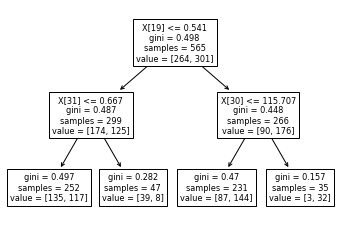

In [24]:
plot_tree(clf)

In [25]:
clf = RandomForestClassifier(n_estimators=50, max_depth=2)
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.6351249053747161

In [26]:
with open('nbaPredict.pickle', 'wb') as dump_var:
    pickle.dump(clf, dump_var)

In [27]:
proba = clf.predict_proba(X_test)

In [28]:
predict = clf.predict(X_test)

In [29]:
arr2 = np.hsplit(proba, 2)

In [33]:
arr = np.stack((y_test, predict, arr2[0].flatten(), arr2[1].flatten()), axis=1)

In [34]:
arr

array([[1.        , 1.        , 0.4725507 , 0.5274493 ],
       [0.        , 1.        , 0.3398743 , 0.6601257 ],
       [1.        , 0.        , 0.50601261, 0.49398739],
       ...,
       [1.        , 0.        , 0.56459036, 0.43540964],
       [1.        , 0.        , 0.54136632, 0.45863368],
       [1.        , 1.        , 0.42354608, 0.57645392]])

In [35]:
df_result = pd.DataFrame(arr, columns=['actual', 'predict', '0', '1'])

In [36]:
df_result.head()

,actual,predict,0,1
0,1.0,1.0,0.472551,0.527449
1,0.0,1.0,0.339874,0.660126
2,1.0,0.0,0.506013,0.493987
3,1.0,1.0,0.309928,0.690072
4,1.0,1.0,0.357857,0.642143


In [37]:
def greater(x):
    if x[0] > x[1]:
        return x[0]
    else:
        return x[1]

def validation(x):
    if x[0]==x[1]:
        return 1
    else:
        return 0

In [38]:
df_result['confidence'] = df_result[['0','1']].apply(greater, axis=1)
df_result['accuracy'] = df_result[['actual','predict']].apply(validation, axis=1)
df_result['count'] = 1

In [39]:
df_result.sample(10)

,actual,predict,0,1,confidence,accuracy,count
1022,1.0,0.0,0.534280,0.465720,0.534280,0,1
73,0.0,1.0,0.415958,0.584042,0.584042,0,1
385,0.0,0.0,0.554060,0.445940,0.554060,1,1
22,1.0,1.0,0.423272,0.576728,0.576728,1,1
757,1.0,0.0,0.557008,0.442992,0.557008,0,1
398,1.0,1.0,0.350964,0.649036,0.649036,1,1
438,0.0,0.0,0.586374,0.413626,0.586374,1,1
1,0.0,1.0,0.339874,0.660126,0.660126,0,1
120,1.0,1.0,0.377253,0.622747,0.622747,1,1
253,0.0,1.0,0.458972,0.541028,0.541028,0,1


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_result['5bins'] = pd.qcut(df_result['confidence'], q=5, labels=['1','2','3','4','5'])
df_result['3bins'] = pd.qcut(df_result['confidence'], q=3, labels=['1','2','3'])
df_result['4bins'] = pd.qcut(df_result['confidence'], q=4, labels=['1','2','3','4'])
df_result['10bins'] = pd.qcut(df_result['confidence'], q=10, labels=['1','2','3','4','5','6','7','8','9','10'])

In [42]:
df_result.head()

,actual,predict,0,1,confidence,accuracy,count,5bins,3bins,4bins,10bins
0,1.0,1.0,0.472551,0.527449,0.527449,1,1,2,1,1,3
1,0.0,1.0,0.339874,0.660126,0.660126,0,1,5,3,4,10
2,1.0,0.0,0.506013,0.493987,0.506013,0,1,1,1,1,1
3,1.0,1.0,0.309928,0.690072,0.690072,1,1,5,3,4,10
4,1.0,1.0,0.357857,0.642143,0.642143,1,1,5,3,4,9


In [43]:
df_agg5 = df_result.groupby('5bins').agg({'accuracy':'mean'})
df_agg3 = df_result.groupby('3bins').agg({'accuracy':'mean'})
df_agg4 = df_result.groupby('4bins').agg({'accuracy':'mean'})
df_agg10 = df_result.groupby('10bins').agg({'accuracy':'mean'})

In [44]:
df_agg10

,accuracy
10bins,
1,0.511278
2,0.583333
3,0.590909
4,0.643939
5,0.606061
6,0.575758
7,0.606061
8,0.689394
9,0.742424


In [ ]:
df_agg5

In [ ]:
df_agg3